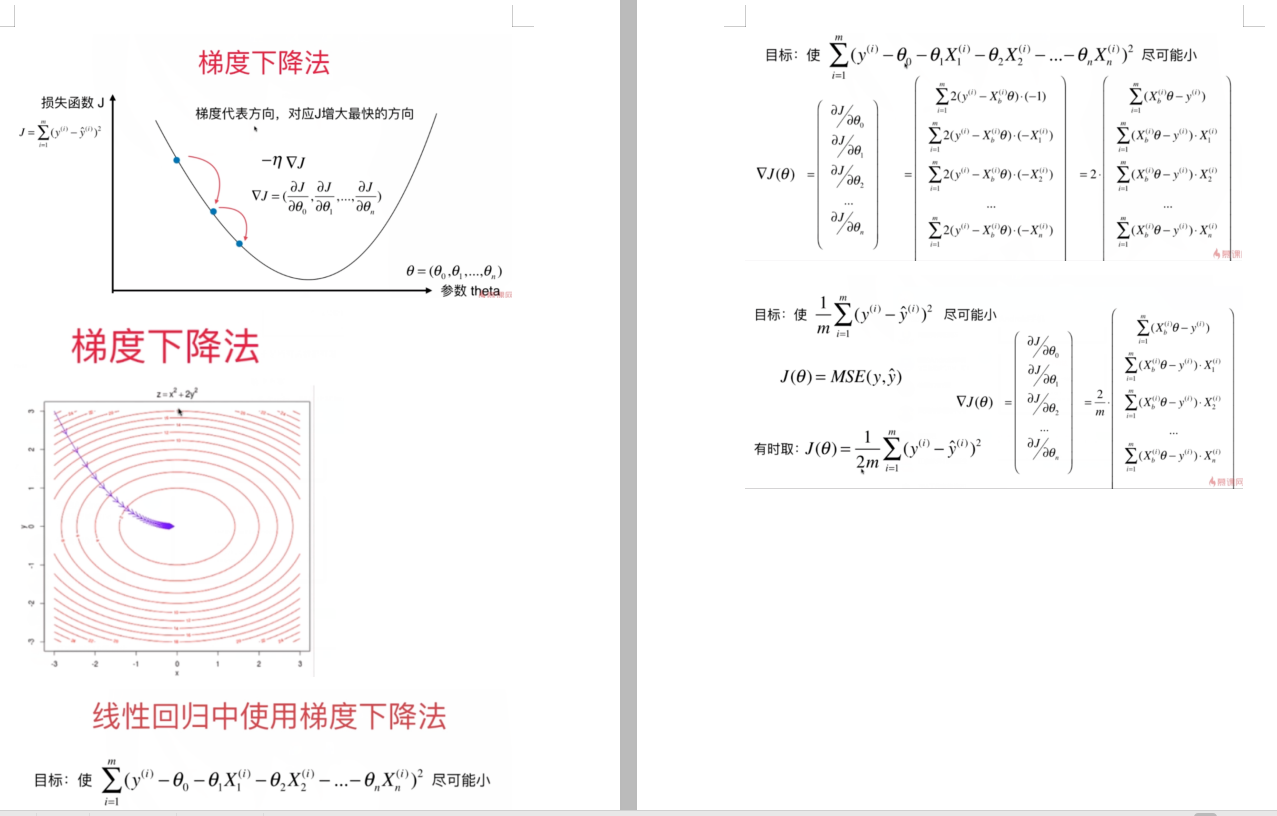

In [1]:
from IPython.display import Image
Image(filename=r"image/x3.png")

# 在线性回归模型中使用梯度下降法

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(666)
x = 2 * np.random.random(size=100) # 产生一个随机数
y = x * 3. + 4. + np.random.normal(size=100) # 加入噪音

In [4]:
X = x.reshape(-1, 1)# 将数组变成只有一列

In [5]:
X.shape

(100, 1)

In [6]:
y.shape

(100,)

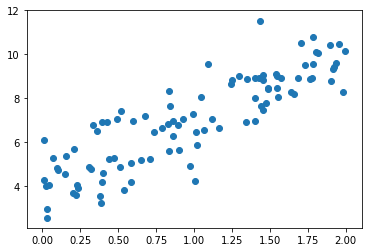

In [7]:
plt.scatter(x, y) # 画出散点图

# 使用梯度下降法训练

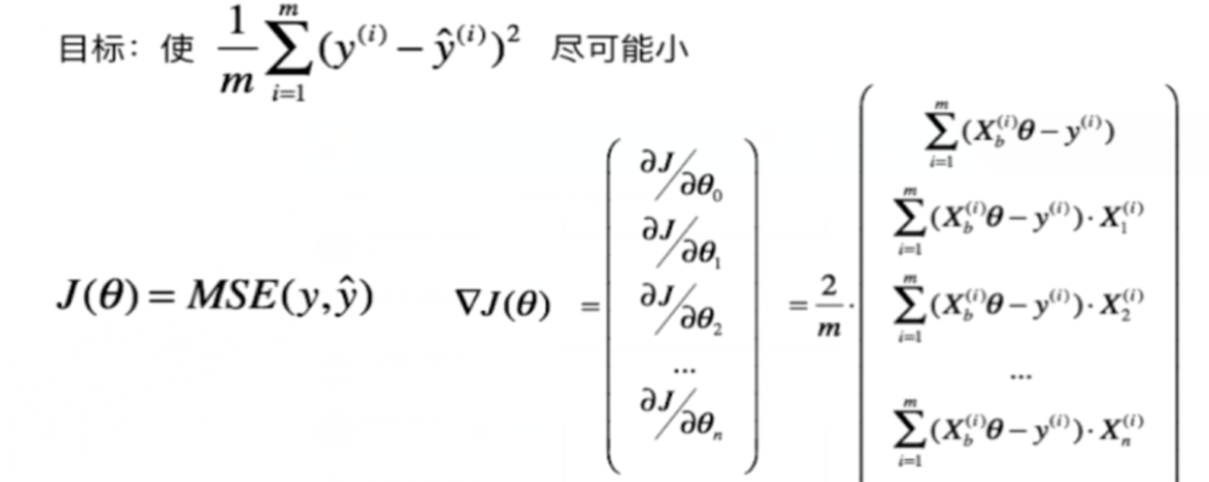

In [8]:
from IPython.display import Image
Image(filename=r"image/x4.png")

In [9]:
# 损失函数
def J(theta, X_b, y):
    try:
        # 上述公式
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf') # float的最大值

In [10]:
# 梯度
def dJ(theta, X_b, y):
    res = np.empty(len(theta)) # 分配theta大小的空间
    # theta=0时
    res[0] = np.sum(X_b.dot(theta) - y)
    # theta != 0时
    for i in range(1, len(theta)):
        res[i] = np.sum((X_b.dot(theta) - y).dot(X_b[:,i]))
    return res * 2 / len(X_b)

In [11]:
# 梯度下降法
def gradient_decent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta # 初始化theta
    i_iter = 0 # 标记
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y) # 梯度
        last_theta = theta # 上一次theta
        
        # 损失值变化几乎为0
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        i_iter += 1
        
    return theta       

In [12]:
X_b = np.hstack([np.ones((len(X), 1)), x.reshape(-1,1)]) # 在原先的x增加一列，(len(X), 1) 行列
initial_theta = np.zeros(X_b.shape[1]) # 向量 特征数+1 X_b的列数
eta = 0.01

theta = gradient_decent(X_b, y, initial_theta, eta)

# 封装我们的线性回归算法

In [14]:
%run C:\Learning\jupyter-notebook\ml\playML\LinearRegression.py

In [16]:
lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [17]:
lin_reg.coef_

array([3.00706277])

In [18]:
lin_reg.interception_

4.021457858204859